
# NLP (S1-22_DSECCZG530) Assignment #1

Group Number: 24 <br>
Group Members:
1. Ashwini Kumar Saurabh (Roll No: 2021c104011)
2. Arya Banerjee (Roll No: 2021c104010)
3. Rishabh Chowdhury (Roll No: 2021c104023)

Dataset:  
https://drive.google.com/file/d/1x0oiWyLUns9002jTDj2CzIE6yqbglN__/view?usp=sharing


In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

import nltk
from nltk.corpus import treebank
from nltk.corpus import brown
from nltk.corpus.reader import ConcatenatedCorpusView
from nltk.corpus.reader.util import ConcatenatedCorpusView
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.grammar import induce_pcfg
import os
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from nltk.parse import ViterbiParser
nltk.download('brown')
nltk.download('treebank')
nltk.download('stopwords')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk

True

## 1. Download the dataset and Create a dataframe named as food then check the head, info, and describe methods on created dataframe food.

Download the dataset <br>Create a dataframe named as food then <br>check the head, info, and describe methods on created dataframe food. <br> **Note** :Use 50% of dataset from the original dataset given

In [4]:
# Create a dataframe named as food
food = pd.read_csv('Reviews.csv', 
                 delimiter=",", 
                 engine="python",
                 error_bad_lines=False,  
                 encoding='utf-8')

# Use 50% of the original dataset
food= food.sample(frac = 0.5)
print('Shape of dataframe food:', food.shape)

<ipython-input-4-f3e0e065a7d2>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  food = pd.read_csv(path,   #'Reviews.csv',


Shape of dataframe food: (284227, 10)


In [5]:
# Chech the head
food.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
549935,549936,B004KARTKU,A1I55477UVGN8T,LG,0,0,5,1346630400,Yum!!,I always get these and place it on my desk in ...
404768,404769,B0055UAQSQ,A30IADSL4TJ8N1,Deborah Herold,0,0,5,1348444800,good eats,It is getting harder to get curly wurly around...
141930,141931,B003GTR8IO,A2BZ7MYTSNYMEW,"Michelle L. Beck ""Always the Devourer of Good...",0,0,5,1290816000,"Smooth, with a hint of vanilla.",I traditionally drink my coffee with a little ...
30252,30253,B000DZFMEQ,ADT7O1C83DE53,MiraWhit,1,1,5,1308441600,Makes a GREAT sandwich!!!,I've tried several gf bread mixes and Pamela's...
58107,58108,B000NY8WU8,A2IS94IJSHNFK0,"c joy ""book lover/Apple fangirl""",0,0,5,1323561600,Excellent seasoning!,I was fortunate to find this product at our lo...


In [6]:
# info
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284227 entries, 549935 to 251136
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      284227 non-null  int64 
 1   ProductId               284227 non-null  object
 2   UserId                  284227 non-null  object
 3   ProfileName             284220 non-null  object
 4   HelpfulnessNumerator    284227 non-null  int64 
 5   HelpfulnessDenominator  284227 non-null  int64 
 6   Score                   284227 non-null  int64 
 7   Time                    284227 non-null  int64 
 8   Summary                 284214 non-null  object
 9   Text                    284227 non-null  object
dtypes: int64(5), object(5)
memory usage: 23.9+ MB


In [7]:
# describe
food.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,284227.000000,284227.000000,284227.000000,284227.000000,2.842270e+05
mean,284375.117800,1.722095,2.207718,4.182460,1.296248e+09
std,164286.181138,7.256697,7.922265,1.310034,4.801498e+07
min,5.000000,0.000000,0.000000,1.000000,9.408096e+08
25%,142047.000000,0.000000,0.000000,4.000000,1.271290e+09
50%,284207.000000,0.000000,1.000000,5.000000,1.311034e+09
75%,427259.500000,2.000000,2.000000,5.000000,1.332634e+09
max,568454.000000,844.000000,923.000000,5.000000,1.351210e+09


## 2. Create another dataframe name called Review with Score and Text column. Perform pre-processing steps like Removing Punctuations, Numbers, and Special Characters, Stop Words in dataset.

In [8]:
# Create another dataframe name called Review with Score and Text column.
Review=food[['Score','Text']]
Review.shape

(284227, 2)

### Perform pre-processing steps 

In [9]:
#Removing Punctuations,Numbers, and Special Characters
import re
Review['Text'] = Review['Text'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x)) # Remove punctuations and special characters
Review['Text'] = Review['Text'].apply(lambda x: re.sub(r'\d+', ' ', x)) # Remove numbers


#df2 = df.loc[:, ['A']]

<ipython-input-9-ba067e97de5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Review['Text'] = Review['Text'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x)) # Remove punctuations and special characters
<ipython-input-9-ba067e97de5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Review['Text'] = Review['Text'].apply(lambda x: re.sub(r'\d+', ' ', x)) # Remove numbers


In [10]:
#Remove stop words


# load the stopwords for the English language
stop_words = set(stopwords.words('english'))

# define a function to remove stop words from a given sentence
def remove_stopwords(sentence):
    # split sentence into individual words
    words = sentence.split()
    # remove stop words from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # join the filtered words back into a sentence
    filtered_sentence = " ".join(filtered_words)
    return filtered_sentence

Review['Text'] = Review['Text'].apply(remove_stopwords)


<ipython-input-10-a2fb8a1e49ad>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Review['Text'] = Review['Text'].apply(remove_stopwords)


In [11]:
print(Review.head)

<bound method NDFrame.head of         Score                                               Text
549935      5  always get place desk office within week two g...
404768      5  getting harder get curly wurly around area sev...
141930      5  traditionally drink coffee little vanilla crea...
30252       5  tried several gf bread mixes Pamela favorite f...
58107       5  fortunate find product local grocery store ava...
...       ...                                                ...
82281       4  products came timely manner fresh packaging go...
450677      5  mixed product henna using hair nice healthy lo...
170082      5  forgotten good actually little goes long way e...
319672      5  cookies delicious love guy rated insisting com...
251136      5  cat years recently diagnosed Kidney Failure br...

[284227 rows x 2 columns]>


## 3.Normalize review by using Stemming or Lemmatization.

In [12]:
# load the stopwords for the English language
stop_words = set(stopwords.words('english'))

# define a function to normalize a given sentence using stemming or lemmatization
def normalize_text(sentence, method='stemming'):
    # split sentence into individual words
    words = sentence.split()
    # remove stop words from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # apply stemming or lemmatization to each word
    if method == 'stemming':
        stemmer = PorterStemmer()
        normalized_words = [stemmer.stem(word) for word in filtered_words]
    elif method == 'lemmatization':
        lemmatizer = WordNetLemmatizer()
        normalized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    else:
        raise ValueError('Invalid normalization method specified')
    # join the normalized words back into a sentence
    normalized_sentence = " ".join(normalized_words)
    return normalized_sentence

# sample input dataframe

# normalize the 'text' column of the dataframe using stemming
Review['cleaned_text'] = Review['Text'].apply(lambda x: normalize_text(x, method='stemming'))
'''
# normalize the 'text' column of the dataframe using lemmatization
Review['lemmatized_text'] = Review['Text'].apply(lambda x: normalize_text(x, method='lemmatization'))
'''
# print the normalized dataframe
print(Review)

        Score                                               Text  \
549935      5  always get place desk office within week two g...   
404768      5  getting harder get curly wurly around area sev...   
141930      5  traditionally drink coffee little vanilla crea...   
30252       5  tried several gf bread mixes Pamela favorite f...   
58107       5  fortunate find product local grocery store ava...   
...       ...                                                ...   
82281       4  products came timely manner fresh packaging go...   
450677      5  mixed product henna using hair nice healthy lo...   
170082      5  forgotten good actually little goes long way e...   
319672      5  cookies delicious love guy rated insisting com...   
251136      5  cat years recently diagnosed Kidney Failure br...   

                                             cleaned_text  
549935  alway get place desk offic within week two gon...  
404768  get harder get curli wurli around area sever f...  
141

<ipython-input-12-65982c9d873c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Review['cleaned_text'] = Review['Text'].apply(lambda x: normalize_text(x, method='stemming'))


### Plot word cloud for the tweets.

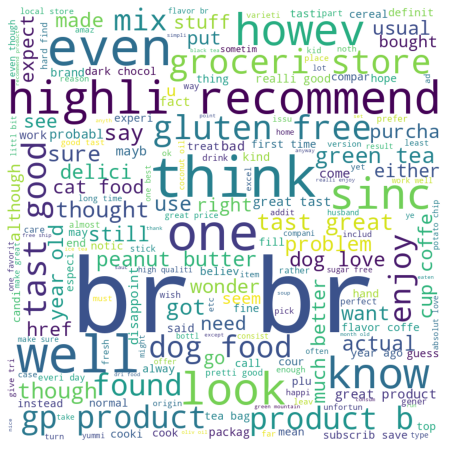

In [13]:
# combine all the tweets into a single string
text = ' '.join(Review['cleaned_text'].tolist())

# generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 5. Create two objects X and y. X will be the 'cleaned_text ' column of Review data frame and y will be the ' Score' column.

### 5.a Create a TF-IDF object and split the data into training and testing sets. Train a Decision tree model and Display the confusion Matrix.

In [14]:
X = Review['cleaned_text']
y = Review['Score']
# create a TF-IDF object
vectorizer = TfidfVectorizer()

# vectorize the text data
X = vectorizer.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a decision tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = clf.predict(X_test)

# display the confusion matrix
cm_tfid = confusion_matrix(y_test, y_pred)
print(cm_tfid)



[[ 2893   326   330   376  1234]
 [  420  1186   249   306   858]
 [  372   231  1808   567  1358]
 [  369   249   482  3825  3230]
 [ 1005   581  1030  2723 30838]]


### 5.b Create a BoW object and split the data into training and testing sets. Train a decision tree model and Display the confusion Matrix.

In [15]:
X = Review['cleaned_text']
y = Review['Score']
# create a BoW  object
vectorizer = CountVectorizer()

# vectorize the text data
X = vectorizer.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a decision tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = clf.predict(X_test)

# display the confusion matrix
cm_bow = confusion_matrix(y_test, y_pred)
print(cm_bow)


[[ 2899   335   328   357  1240]
 [  435  1193   284   293   814]
 [  357   271  1799   577  1332]
 [  341   274   495  3838  3207]
 [  989   560   916  2514 31198]]


### 5.c Compare TF-IDF and BoW.

In [16]:
# define a function to calculate precision and recall.
def precision_recall(confusion_matrix,labels):
  precision = np.zeros(labels)
  recall = np.zeros(labels)
  for i in range(labels):
    # calculate precision for each class. Precision = True Positive / (True Positive + False Positive)
    precision[i] = round(confusion_matrix[i,i] / np.sum(confusion_matrix[:,i]),2)
    # calculate recall for each class. Recall = True Positive / (True Positive + False Negative)
    recall[i] = round(confusion_matrix[i,i] / np.sum(confusion_matrix[i,:]),2)

  return precision,recall


In [17]:
# Get precision and recall corresponding to TF-IDF object
tfidf_precision,tfidf_recall=precision_recall(cm_tfid,5)
print("TF-IDF Precision:", tfidf_precision)     
print("TF-IDF Recall:", tfidf_recall)

TF-IDF Precision: [0.57 0.46 0.46 0.49 0.82]
TF-IDF Recall: [0.56 0.39 0.42 0.47 0.85]


In [18]:
# Get precision and recall corresponding to BoW object
bow_precision,bow_recall=precision_recall(cm_bow,5)
print("BoW Precision:", bow_precision)     
print("BoW Recall:", bow_recall)

BoW Precision: [0.58 0.45 0.47 0.51 0.83]
BoW Recall: [0.56 0.4  0.41 0.47 0.86]


**Note** : We observed that Precision and Recall value for the Decision tree is slightly better with Bag of Words (BoW) as compared to TF-IDF.

## 6. Parse the last 4 rows of ‘text’ using Viterbi Parser

In [19]:
# Load the last 4 rows of 'text' column into a List
sentences = food.tail(4).Text.values.tolist()

#removing special characters from list
s1 = [re.sub(r'[^\w\s]', ' ', s) for s in sentences]

sentences_cleaned = []
for each_row in s1:
  each_row = re.sub(r'\d+', '', each_row)
  sentences_cleaned.append(each_row)

split_sentences = []

for sentence in sentences_cleaned:
  split_sentences.append(sentence.split())


# Train a POS tagger
tagged_sentences = treebank.tagged_sents()
tagger = nltk.tag.DefaultTagger('NN')  # set a default tag to avoid errors
tagger = nltk.tag.UnigramTagger(tagged_sentences, backoff=tagger)
tagger = nltk.tag.BigramTagger(tagged_sentences, backoff=tagger)

# Generate non-terminals for each word in each sentence
non_terminal_sentences = []
for sentence in split_sentences:
    tagged_sentence = tagger.tag(sentence)
    non_terminal_sentence = [(tag, tag) if word.isnumeric() else (tag, word) for word, tag in tagged_sentence]
    non_terminal_sentences.append(non_terminal_sentence)

In [20]:
# Induce a PCFG from the corpus
productions = []
for sentence in non_terminal_sentences:
  for sent in sentence:
    sent = [re.sub(r'[^\w\s]', ' ', s) for s in sent]
    tree = nltk.tree.Tree.fromstring(str(tuple(sent)))
    productions += tree.productions()

# Removing single quote from the productions.rhs()
productions_cleaned = []
for prod in productions:
  prod = nltk.grammar.Production(prod.lhs(), [s.replace("'", "") for s in prod.rhs()])
  productions_cleaned.append(prod)

# Induce a probabilistic context-free grammar from the productions
pcfg = nltk.induce_pcfg(nltk.Nonterminal('S'), productions_cleaned)

# Train a Viterbi Parser on the PCFG
parser = nltk.ViterbiParser(pcfg, trace=2)

#Parse a new sentence:
Text_collection = sentences
Text_collection = [re.sub(r'[^\w\s]', ' ', s) for s in Text_collection]

Text_collection_cleaned=[]
for each_row in Text_collection:
  each_row = re.sub(r'\d+', '', each_row)
  Text_collection_cleaned.append(each_row)

for sentence in Text_collection_cleaned:
  sentence = sentence.split()
  for parse in parser.parse(sentence):
      print(parse)

Inserting tokens into the most likely constituents table...
   Insert: |=.........................| I
   Insert: |.=........................| mixed
   Insert: |..=.......................| this
   Insert: |...=......................| product
   Insert: |....=.....................| with
   Insert: |.....=....................| henna
   Insert: |......=...................| After
   Insert: |.......=..................| using
   Insert: |........=.................| my
   Insert: |.........=................| hair
   Insert: |..........=...............| was
   Insert: |...........=..............| nice
   Insert: |............=.............| and
   Insert: |.............=............| healthy
   Insert: |..............=...........| looking
   Insert: |...............=..........| It
   Insert: |................=.........| is
   Insert: |.................=........| awesome
   Insert: |..................=.......| and
   Insert: |...................=......| I
   Insert: |....................=.....|

## 7. Display the HMM POS tagging on the first 4 rows of ‘cleaned_text’.

In [21]:
# Extracting 'cleaned_text'
cleaned_text = Review['cleaned_text']

# Extracting first 4 rows of 'cleaned_text'
cleaned_head = cleaned_text.head(4)

# Initializing a list to store the tags
tags = []


#loop over the rows of 'cleaned_text'
for text in cleaned_head:
    #tokenize the sentence into list of words
    tokens = nltk.word_tokenize(str(text))
    #POS tag the words
    pos_tags = nltk.pos_tag(tokens, tagset='universal', lang='eng')
    #Populate each word and its corresponding tag to the list
    tags.append(pos_tags)


# Print the tags of first 4 lines of 'cleaned_text'
for tag in tags:
  print(tag)

[('alway', 'ADV'), ('get', 'VERB'), ('place', 'NOUN'), ('desk', 'NOUN'), ('offic', 'NOUN'), ('within', 'ADP'), ('week', 'NOUN'), ('two', 'NUM'), ('gone', 'VERB'), ('delici', 'NOUN')]
[('get', 'VERB'), ('harder', 'ADJ'), ('get', 'NOUN'), ('curli', 'ADJ'), ('wurli', 'NOUN'), ('around', 'ADP'), ('area', 'NOUN'), ('sever', 'NOUN'), ('famili', 'VERB'), ('member', 'NOUN'), ('enjoy', 'NOUN'), ('curli', 'NOUN'), ('wurli', 'NOUN'), ('nice', 'ADJ'), ('get', 'VERB'), ('full', 'ADJ'), ('box', 'NOUN'), ('share', 'NOUN'), ('candi', 'NOUN'), ('around', 'ADP'), ('special', 'ADJ'), ('treat', 'NOUN'), ('came', 'VERB'), ('safe', 'ADJ'), ('quickli', 'NOUN'), ('sellar', 'ADJ'), ('quit', 'NOUN'), ('pleas', 'NOUN')]
[('tradit', 'NOUN'), ('drink', 'NOUN'), ('coffe', 'NOUN'), ('littl', 'NOUN'), ('vanilla', 'NOUN'), ('creamer', 'NOUN'), ('usual', 'ADJ'), ('brew', 'VERB'), ('cup', 'ADJ'), ('starbuck', 'ADV'), ('hous', 'ADJ'), ('blend', 'NOUN'), ('coffe', 'NOUN'), ('home', 'NOUN'), ('everi', 'NOUN'), ('morn', 'VE